1. Summary Statistics
<br/>(a) Calculate and display the mean and volatility of each asset’s excess return. (Recall we use
volatility to refer to standard deviation.)
<br/>(b) Which assets have the best and worst Sharpe ratios4?

In [121]:
# Import pandas, numpy
import pandas as pd
import numpy as np
# Read excel file, sheet total returns
totalReturnData = pd.read_excel('../data/multi_asset_etf_data.xlsx', 'total returns')
# Set the index to Data (rather than default 0 indexing)
totalReturnData = totalReturnData.drop(columns=['SHV'])
totalReturnData = totalReturnData.set_index('Date')
# Display top rows for validation
totalReturnData.head()

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
Date,,,,,,,,,,,
2009-04-30,0.008993,-0.001000,0.155582,0.115190,0.138460,-0.027452,0.296151,0.230202,0.022882,0.099346,-0.017952
2009-05-31,0.053672,0.162663,0.159400,0.131918,0.028555,-0.020773,0.022727,0.053892,0.027865,0.058454,0.019967
2009-06-30,0.005149,-0.026259,-0.022495,-0.014050,0.033516,-0.005572,-0.024863,0.045449,-0.003436,-0.000655,0.001982
2009-07-31,0.031284,0.018568,0.110146,0.100415,0.069191,0.008317,0.105799,0.143247,0.015326,0.074606,0.000879
2009-08-31,0.007628,-0.040365,-0.013136,0.045031,-0.016969,0.007635,0.131939,0.033413,-0.004151,0.036939,0.008413


In [122]:
# Summary Statistics- 1(a)
# Calculate the mean of the data * 12 for annualization (don't want monthly data)
# Defaults to Axis=0 (columns)
summaryStatistics = (totalReturnData.mean() * 12).to_frame('Mean')

# Add in column for volatility
# Volatility is standard deviation, annualized with sqrt(12)
summaryStatistics['Volatility'] = totalReturnData.std() * np.sqrt(12)

# Calculate Sharpe Ratios (Sharpe = mean/volatility). Higher = Better
summaryStatistics['Sharpe'] = summaryStatistics['Mean']/summaryStatistics['Volatility']

# Display result
summaryStatistics

,Mean,Volatility,Sharpe
BWX,0.004653,0.078535,0.059248
DBC,0.038846,0.180186,0.215590
EEM,0.072621,0.191787,0.378655
EFA,0.081124,0.161885,0.501125
HYG,0.071588,0.089403,0.800730
IEF,0.025833,0.060077,0.429996
IYR,0.150128,0.184407,0.814113
PSP,0.133272,0.221299,0.602227
QAI,0.022862,0.048879,0.467723
SPY,0.150293,0.144811,1.037857


In [123]:
# Best Sharpe Ratio
summaryStatistics.nlargest(1, 'Sharpe')

,Mean,Volatility,Sharpe
SPY,0.150293,0.144811,1.037857


In [124]:
# Worst Sharpe Ratio
summaryStatistics.nsmallest(1, 'Sharpe')

,Mean,Volatility,Sharpe
BWX,0.004653,0.078535,0.059248


Based on the calculations above, we can see that the asset class with the worst Sharpe ratio is BWX (SPDR Bloomberg International Tr), with a ratio of 0.059248. The asset class with the best Sharpe ratio is SPY (SPDR S&P 500), with a ratio of 1.037857.

2. Descriptive Analysis
<br/>(a) Calculate the correlation matrix of the returns. Which pair has the highest correlation?
And the lowest?
<br/>(b) How well have TIPS done in our sample? Have they outperformed domestic bonds? Foreign
bonds?
<br/>(c) Based on the data, do TIPS seem to expand the investment opportunity set, implying that
Harvard should consider them as a separate asset?

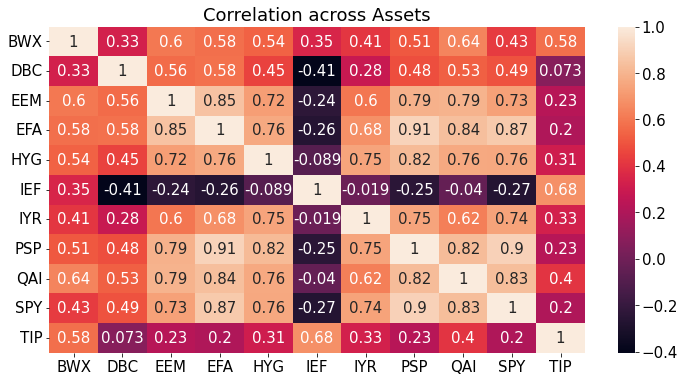

In [125]:
# Improvement 1
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13

from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)
correlationMatrix = round(totalReturnData.corr(), 4)
sns.heatmap(correlationMatrix,annot=True);
plt.title('Correlation across Assets');

In [126]:
# Make the diagonals NaN so we can find the highest and lowest pairwise correlations
correlationMatrix[correlationMatrix == 1] = None

corr_rank = correlationMatrix.unstack().sort_values().dropna()
pair_max = corr_rank.index[-1]
pair_min = corr_rank.index[0]

print(f'MIN Correlation pair is {pair_min}')
print(f'MAX Correlation pair is {pair_max}')


MIN Correlation pair is ('IEF', 'DBC')
MAX Correlation pair is ('EFA', 'PSP')


In [127]:
# Difference 1
abs_corr_rank = abs(corr_rank).sort_values()
abs_pair_max = abs_corr_rank.index[-1]
abs_pair_min = abs_corr_rank.index[0]

print(f'MIN Correlation pair is {abs_pair_min}:{abs_corr_rank[0]}')
print(f'MAX Correlation pair is {abs_pair_max}:{abs_corr_rank[-1]}')

MIN Correlation pair is ('IYR', 'IEF'):0.0186
MAX Correlation pair is ('EFA', 'PSP'):0.9087


2(a) The pair of asset classes with the lowest correlation is IEF (iShares 7-10 Year Treasury Bond) and DBC (Invesco DB Commodity Index Trac). The pair of asset classes with the highest correlation is EFA (iShares MSCI EAFE ETF) and PSP (Invesco Global Listed Private E).

In [128]:
# Compare TIPS to domestic bonds (IEF) and foreign bonds (BWX)
summaryStatistics.loc[['TIP', 'IEF', 'BWX']]

,Mean,Volatility,Sharpe
TIP,0.034967,0.047833,0.731032
IEF,0.025833,0.060077,0.429996
BWX,0.004653,0.078535,0.059248


2(b) Remembering that Mean = Returns, TIPS outperformed both the domestic and foreign bonds in returns. Additionally, TIPS had a lower Volatility than either of the other asset classes, so its overall Sharpe Ratio was better.

2(c) TIP is not very highly correlated to any other asset classes. Only IEF and BWX have a cross-correlation with TIP > 0.5. Given that TIP outperformed both of the asset classes it is most closely correlated with, TIP is worth adding to the portfolio.

3. The MV frontier.
<br/> (a) Compute and display the weights of the tangency portfolios: wt.
<br/> (b) Compute the mean, volatility, and Sharpe ratio for the tangency portfolio corresponding to
wt.

In [129]:
# Remember tangency portfolio = ( 1 / 1' * (Sigma^-1) * mu) * (Sigma^-1) * mu
# Where Sigma^-1 is the inverse of the covariance matrix
# mu is the vector of mean excess returns
# Write method compute_tangency to return weights of the tangency portfolio, given matrix of excess returns


def compute_tangency(totalReturnMatrix):
    # Get the covariance matrix based on excess returns
    sigma = totalReturnMatrix.cov()
    
    # Get the number of asset classes (in this example should be 11)
    n = sigma.shape[0]
    
    # Get the vector of mean excess returns
    mu = totalReturnMatrix.mean()
    
    # Get sigma inverse
    sigma_inv = np.linalg.inv(sigma)
    
    # Now we have all the pieces, do the calculation
    weights = (sigma_inv @ mu) / (np.ones(n) @ sigma_inv @ mu)
    
    # Convert back to a Series for convenience
    return pd.Series(weights, index=mu.index)

tangency_weights = compute_tangency(totalReturnData)
tangency_weights.to_frame('Tangency Weights')

,Tangency Weights
BWX,-1.335168
DBC,0.239151
EEM,0.339786
EFA,-0.117068
HYG,1.070489
IEF,2.457952
IYR,-0.307783
PSP,-0.513078
QAI,-3.955222
SPY,2.430623


(b) Compute the mean, volatility, and Sharpe ratio for the tangency portfolio corresponding to the tangency portfolio.

In [130]:
# Difference 2 / But same results
def portfolio_stats(totalReturnData, portfolio_weights):
    # Calculate the mean by multiplying the mean excess returns by the tangency weights and annualizing
    # TODO: double check where these formulas came from (class notes?)
    mean = totalReturnData.mean() @ portfolio_weights * 12

    # Volatility = sqrt(variance), and by class notes: variance = allocation_matrix * covariance_matrix * allocation_matrix
    # Annualize the result with sqrt(12)
    vol = (totalReturnData @ portfolio_weights).std()*np.sqrt(12)

    # Sharpe Ratio is mean / vol
    sharpe_ratio = mean / vol

    # Format for easy reading
    return round(pd.DataFrame(data = [mean, vol, sharpe_ratio], 
        index = ['Mean', 'Volatility', 'Sharpe'], 
        columns = ['Portfolio Stats']), 4)
    
portfolio_stats(totalReturnData, tangency_weights)

,Portfolio Stats
Mean,0.3428
Volatility,0.1759
Sharpe,1.9493


4. The allocation.
    <br/>(a) Compute and display the weights of MV portfolios with target returns of μp = .015.
    <br/>(b) What is the mean, volatility, and Sharpe ratio for wp?
    <br/>(c) Discuss the allocation. In which assets is the portfolio most long? And short?
    <br/>(d) Does this line up with which assets have the strongest Sharpe ratios?

In [131]:
# Compute weights for return of 0.015
def compute_weights(totalReturnData, tangency_weights, target_return):
    mu = totalReturnData.mean()
    sigma = totalReturnData.cov()
    sigma_inv = np.linalg.inv(sigma)
    n = sigma.shape[0]
    weight_v = pd.Series((sigma_inv @ np.ones(n)) / (np.ones(n) @ sigma_inv @ np.ones(n)), index=mu.index)
    weight_t = tangency_weights
    coeffienct = (target_return-mu.T@weight_v)/(mu.T@weight_t-mu.T@weight_v)  
    
    return coeffienct*weight_t+(1-coeffienct)*weight_v

optimized_portfolio = compute_weights(totalReturnData, tangency_weights, 0.015)
optimized_portfolio

BWX   -0.743896
DBC    0.125074
EEM    0.140120
EFA   -0.043110
HYG    0.606047
IEF    1.303991
IYR   -0.163098
PSP   -0.316038
QAI   -1.545644
SPY    1.210202
TIP    0.426352
dtype: float64

In [132]:
sum(optimized_portfolio)

1.000000000000001

In [133]:
portfolio_stats(totalReturnData, optimized_portfolio)

,Portfolio Stats
Mean,0.1800
Volatility,0.0934
Sharpe,1.9271


In [134]:
# (c) Discuss the allocation. In which assets is the portfolio most long? And short?

optimized_portfolio.sort_values() 

QAI   -1.545644
BWX   -0.743896
PSP   -0.316038
IYR   -0.163098
EFA   -0.043110
DBC    0.125074
EEM    0.140120
TIP    0.426352
HYG    0.606047
SPY    1.210202
IEF    1.303991
dtype: float64

Based on the sorting above, we can see the the portfolio is most long on IEF. It is also almost identically long on SPY. It is most short on QAI. It is also short a few other assets, but not nearly to the extent of QAI.

In [135]:
# Does this line up with which assets have the strongest Sharpe ratios?
summaryStatistics.sort_values('Sharpe')

,Mean,Volatility,Sharpe
BWX,0.004653,0.078535,0.059248
DBC,0.038846,0.180186,0.215590
EEM,0.072621,0.191787,0.378655
IEF,0.025833,0.060077,0.429996
QAI,0.022862,0.048879,0.467723
EFA,0.081124,0.161885,0.501125
PSP,0.133272,0.221299,0.602227
TIP,0.034967,0.047833,0.731032
HYG,0.071588,0.089403,0.800730
IYR,0.150128,0.184407,0.814113


In [136]:
# Difference 3
# Does this line up with which assets have the strongest Sharpe ratios?
rank_df = pd.DataFrame(columns=['Sharpe_Rank','Weight_Rank'])
rank_df['Sharpe_Rank']=summaryStatistics['Sharpe'].rank(ascending=False)
rank_df['Weight_Rank']=optimized_portfolio.rank(ascending=False)
print('Correlation between Sharpe Rank and Weight Rank is {}.'.format(rank_df.corr()['Sharpe_Rank']['Weight_Rank']))
rank_df.sort_values('Sharpe_Rank')

Correlation between Sharpe Rank and Weight Rank is 0.309090909090909.


,Sharpe_Rank,Weight_Rank
SPY,1.0,2.0
IYR,2.0,8.0
HYG,3.0,3.0
TIP,4.0,4.0
PSP,5.0,9.0
EFA,6.0,7.0
QAI,7.0,11.0
IEF,8.0,1.0
EEM,9.0,5.0
DBC,10.0,6.0


No, it does not. While SPY does have the highest Sharpe ratio, IEF's Sharpe ratio is actually smaller than QAI's. And the correlation between these two ranks is quite small.

5. Simple Portfolios
<br/>(a) Calculate the performance of the equally-weighted portfolio over the sample. Rescale the
entire weighting vector to have target mean μp = .015. Report its mean, volatility, and
Sharpe ratio.
<br/>(b) Calculate the performance of the “risk-parity” portfolio over the sample. Risk-parity is a
term used in a variety of ways, but here we have in mind setting the weight of the portfolio
to be proportional to the inverse of its full-sample volatility estimate.
wi = 1/σi
This will give the weight vector, w, but you will need to rescale it to have a target mean
of μp = .015.
<br/>(c) How does these compare to the MV portfolio from problem 2.4?

In [137]:
# First get the equally weighted portfolio
# Create a vector of the same length as the tangency_weights (11 in this example)
# Then, anywhere the weight is 1, set it equal to 1/n (1/11 in this example)
equal_weights = np.ones(len(tangency_weights))
equal_weights[equal_weights==1] = 1/len(tangency_weights)

target_mean = 0.015

# Scale for target return
equal_weights = equal_weights * target_mean / (totalReturnData.mean().sum()/11)
portfolio_stats(totalReturnData, equal_weights)

,Portfolio Stats
Mean,0.1800
Volatility,0.2517
Sharpe,0.7152


In [138]:
# First get weights, 1/vol (Remember volatility = standard deviation)
weights = 1/totalReturnData.std()

target_return = 0.015
weights = weights * target_return / (weights @ totalReturnData.mean())
weights.to_frame('Weights')

,Weights
BWX,0.379571
DBC,0.165439
EEM,0.155431
EFA,0.184142
HYG,0.333430
IEF,0.496193
IYR,0.161652
PSP,0.134704
QAI,0.609866
SPY,0.205852


In [139]:
portfolio_stats(totalReturnData, weights)

,Portfolio Stats
Mean,0.1800
Volatility,0.2356
Sharpe,0.7640


How does these compare to the MV portfolio from problem 2.4?
<br/> In this Risk Parity example, the Volatility is significantly higher, and Sharpe is much lower. However, the Risk Parity portfolio doesn't have any short positions and is not nearly as extreme in its holdings as the MV Portfolio.

In [140]:
# 6. Assess how much the Sharpe Ratio goes down if we drop TIPS from the investment set, (and
# just have a 10-asset problem.) See how much it decreases the performance statistics in 2.4. And
# how much worse is the performance in 3.3?

# Drop TIPS
totalReturnDataWithoutTips = totalReturnData.drop(columns=['TIP'])
tangency_weights_without_tips = compute_tangency(totalReturnDataWithoutTips)
optimized_portfolio_without_tips = compute_weights(totalReturnDataWithoutTips, tangency_weights_without_tips, 0.015)
portfolio_stats(totalReturnDataWithoutTips, optimized_portfolio_without_tips)

,Portfolio Stats
Mean,0.1800
Volatility,0.0941
Sharpe,1.9131


We see a very slight increase in Volatility (0.0004) and a minimal decrease in the Sharpe Ratio (.0082). There is almost no difference in the performance statistics when TIPS is excluded.

7. Out-of-Sample Performance
<br/>Let’s divide the sample to both compute a portfolio and then check its performance out of
sample.
<br/>(a) Using only data through the end of 2021, compute wp for μp = .015, allocating to all 11
assets.
<br/>(b) Using those weights, calculate the portfolio’s Sharpe ratio within that sample, through the
end of 2021.
<br/>(c) Again using those weights, (derived using data through 2021,) calculate the portfolio’s
Sharpe ratio based on performance in 2022.

In [141]:
# First just get data through 2021
totalReturnData2021 = totalReturnData.loc[:'2021']

# Compute tangency weights
tangency_weights_2021 = compute_tangency(totalReturnData2021)

# Get optimized portfolio
optimized_portfolio_2021 = compute_weights(totalReturnData2021, tangency_weights_2021, 0.015)
optimized_portfolio_2021

BWX   -0.260550
DBC   -0.013134
EEM    0.003842
EFA   -0.058326
HYG    0.665042
IEF    1.186294
IYR   -0.257773
PSP   -0.087996
QAI   -1.587112
SPY    1.109137
TIP    0.300576
dtype: float64

In [142]:
# Calculate sharpe ratio for 2021 portfolio
portfolio_stats(totalReturnData2021, optimized_portfolio_2021)

,Portfolio Stats
Mean,0.180
Volatility,0.078
Sharpe,2.308


In [143]:
# Calculate Sharpe ratio for 2022 data using 2021 weights
totalReturnData2022 = totalReturnData.loc['2022':]

portfolio_stats(totalReturnData2022, optimized_portfolio_2021)

,Portfolio Stats
Mean,-0.1707
Volatility,0.2299
Sharpe,-0.7423
